#### Importing Basic Libraries and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from scipy.stats import chi2_contingency 
from sklearn.ensemble import RandomForestClassifier


loan = pd.read_excel('D:/Hashchain/dataset.xlsx', sheet_name = 'Sheet1')
loan.info()

loan.drop(['Unnamed: 0', 'Loan_ID'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Loan_ID            981 non-null    object 
 2   Gender             981 non-null    object 
 3   Married            981 non-null    object 
 4   Dependents         981 non-null    object 
 5   Education          981 non-null    object 
 6   Self_Employed      981 non-null    object 
 7   ApplicantIncome    981 non-null    int64  
 8   CoapplicantIncome  981 non-null    float64
 9   Loamount           954 non-null    float64
 10  Loan_Amount_Term   981 non-null    int64  
 11  Credit_History     981 non-null    int64  
 12  Property_Area      981 non-null    object 
 13  Loan_Status        981 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 107.4+ KB


##### `Converting the Loan Status to binary Variable :`

In [2]:
loan['response'] = loan['Loan_Status'].map({'Y':1, 'N': 0})
loan.drop(['Loan_Status'], axis = 1, inplace = True)

### EDA

Find the response rate for each of the categorical variable :
   - Gender
   - Married
   - Dependents
   - Education
   - Self_Employed
   - Credit_History
   - Property_Area
   - Loan_Amount_Term 

In [3]:
cat_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Amount_Term']
cont_var = ['ApplicantIncome', 'CoapplicantIncome', 'Loamount']

`Gender :`

In [4]:
count_prospects_gender = loan.groupby('Gender')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_gender = loan.groupby('Gender')['response'].count().reset_index(name = 'No_of_prospects')
agg_gender = count_prospects_gender.merge(No_of_prospect_gender, on = 'Gender')
agg_gender['response_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No_of_prospects']).round(4)
agg_gender

,Gender,count_prospects,No_of_prospects,response_rate
0,Female,129,182,70.88
1,Male,593,799,74.22


`Married :`

In [5]:
count_prospects_status = loan.groupby('Married')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_status = loan.groupby('Married')['response'].count().reset_index(name = 'No_of_prospects')
agg_status = count_prospects_status.merge(No_of_prospect_status, on = 'Married')
agg_status['response_rate'] = 100*(agg_status['count_prospects']/agg_status['No_of_prospects']).round(4)
agg_status

,Married,count_prospects,No_of_prospects,response_rate
0,No,240,347,69.16
1,Yes,482,634,76.03


`Dependents :`

In [6]:
count_prospects_dependents = loan.groupby('Dependents')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_dependents = loan.groupby('Dependents')['response'].count().reset_index(name = 'No_of_prospects')
agg_dependents = count_prospects_dependents.merge(No_of_prospect_dependents, on = 'Dependents')
agg_dependents['response_rate'] = 100*(agg_dependents['count_prospects']/agg_dependents['No_of_prospects']).round(4)
agg_dependents

,Dependents,count_prospects,No_of_prospects,response_rate
0,0,418,570,73.33
1,1,118,160,73.75
2,2,122,160,76.25
3,3+,64,91,70.33


`Education :`

In [7]:
count_prospects_education = loan.groupby('Education')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_education = loan.groupby('Education')['response'].count().reset_index(name = 'No_of_prospects')
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'Education')
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)
agg_education

,Education,count_prospects,No_of_prospects,response_rate
0,Graduate,575,763,75.36
1,Not Graduate,147,218,67.43


`Self-Employed :`

In [8]:
count_prospects_self_emp = loan.groupby('Self_Employed')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_self_emp = loan.groupby('Self_Employed')['response'].count().reset_index(name = 'No_of_prospects')
agg_self_emp = count_prospects_self_emp.merge(No_of_prospect_self_emp, on = 'Self_Employed')
agg_self_emp['response_rate'] = 100*(agg_self_emp['count_prospects']/agg_self_emp['No_of_prospects']).round(4)
agg_self_emp

,Self_Employed,count_prospects,No_of_prospects,response_rate
0,No,633,862,73.43
1,Yes,89,119,74.79


`Credit History :`

In [9]:
count_prospects_crd_hist = loan.groupby('Credit_History')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_crd_hist = loan.groupby('Credit_History')['response'].count().reset_index(name = 'No_of_prospects')
agg_crd_hist = count_prospects_crd_hist.merge(No_of_prospect_crd_hist, on = 'Credit_History')
agg_crd_hist['response_rate'] = 100*(agg_crd_hist['count_prospects']/agg_crd_hist['No_of_prospects']).round(4)
agg_crd_hist

,Credit_History,count_prospects,No_of_prospects,response_rate
0,0,7,148,4.73
1,1,715,833,85.83


`Property Area :`

In [10]:
count_prospects_area = loan.groupby('Property_Area')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_area = loan.groupby('Property_Area')['response'].count().reset_index(name = 'No_of_prospects')
agg_area = count_prospects_area.merge(No_of_prospect_area, on = 'Property_Area')
agg_area['response_rate'] = 100*(agg_area['count_prospects']/agg_area['No_of_prospects']).round(4)
agg_area

,Property_Area,count_prospects,No_of_prospects,response_rate
0,Rural,196,290,67.59
1,Semiurban,272,349,77.94
2,Urban,254,342,74.27


`Loan Amount Term :`

In [11]:
count_prospects_term = loan.groupby('Loan_Amount_Term')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_term = loan.groupby('Loan_Amount_Term')['response'].count().reset_index(name = 'No_of_prospects')
agg_term = count_prospects_term.merge(No_of_prospect_term, on = 'Loan_Amount_Term')
agg_term['response_rate'] = 100*(agg_term['count_prospects']/agg_term['No_of_prospects']).round(4)
agg_term

,Loan_Amount_Term,count_prospects,No_of_prospects,response_rate
0,6,0,1,0.00
1,12,2,2,100.00
2,36,1,3,33.33
3,60,3,3,100.00
4,84,6,7,85.71
5,120,4,4,100.00
6,180,47,66,71.21
7,240,7,8,87.50
8,300,14,20,70.00
9,350,1,1,100.00


In [12]:
loan.loc[loan['Loan_Amount_Term'] == 350, 'Loan_Amount_Term'] = 360

### Visualisation of the Variables

`ApplicantIncome:`

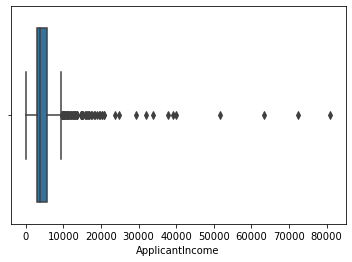

In [13]:
sns.boxplot(x='ApplicantIncome', data=loan)
plt.show()

In [14]:
loan['ApplicantIncome'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95    12500.0
0.96    14583.0
0.97    15903.6
0.98    18232.2
0.99    25671.0
Name: ApplicantIncome, dtype: float64

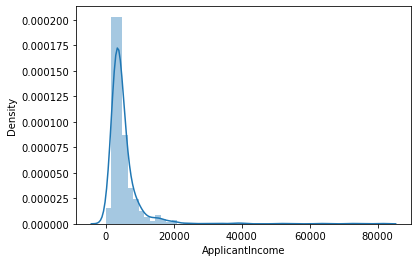

In [17]:
sns.distplot(loan['ApplicantIncome'])
plt.show()

`Loamount:`

In [15]:
loan['Loamount'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95    276.40
0.96    299.64
0.97    321.64
0.98    379.76
0.99    484.70
Name: Loamount, dtype: float64

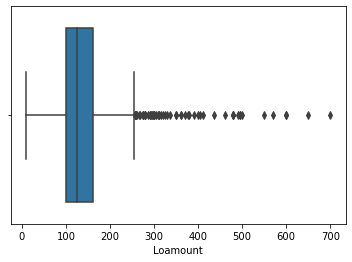

In [16]:
sns.boxplot(x='Loamount', data=loan)
plt.show()

`CoapplicantIncome:`

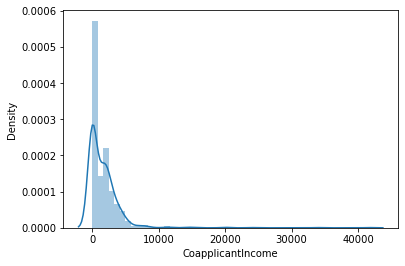

In [18]:
# CoapplicantIncome
sns.distplot(loan['CoapplicantIncome'])
plt.show()

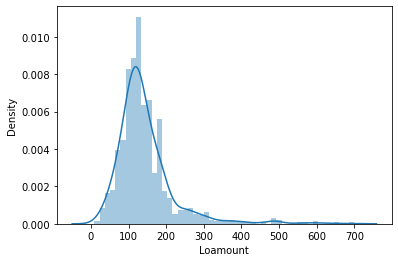

In [19]:
# CoapplicantIncome
sns.distplot(loan['Loamount'])
plt.show()

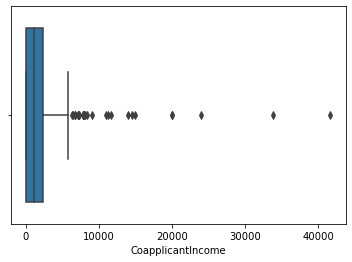

In [20]:
sns.boxplot(x='CoapplicantIncome', data=loan)
plt.show()

In [21]:
loan['CoapplicantIncome'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95     4700.0
0.96     5063.8
0.97     5625.0
0.98     7183.6
0.99    11034.4
Name: CoapplicantIncome, dtype: float64

#### Feature Selection Using Chi-square test of Independence

`Married :`

In [22]:
groupsizes = loan.groupby(['Married', 'response']).size()
ctsum = groupsizes.unstack('response')
print(chi2_contingency(ctsum.fillna(0))[1])

0.02412776740269921


`Dependents :`

In [23]:
groupsizes = loan.groupby(['Dependents', 'response']).size()
ctsum = groupsizes.unstack('response')
print(chi2_contingency(ctsum.fillna(0))[1])

0.7766327984386389


`Education :`

In [24]:
groupsizes = loan.groupby(['Education', 'response']).size()
ctsum = groupsizes.unstack('response')
print(chi2_contingency(ctsum.fillna(0))[1])

0.024123101747319832


`Credit History :`

In [25]:
groupsizes = loan.groupby(['Credit_History', 'response']).size()
ctsum = groupsizes.unstack('response')
print(chi2_contingency(ctsum.fillna(0))[1])

1.292611023838011e-93


`Property Area :`

In [26]:
groupsizes = loan.groupby(['Property_Area', 'response']).size()
ctsum = groupsizes.unstack('response')
print(chi2_contingency(ctsum.fillna(0))[1])

0.011946627533693079


`Dropping the Variables which are not Correlated to Response rate :`

In [27]:
drop_var = ['Self_Employed', 'Gender', 'Dependents']
loan.drop(drop_var, axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            981 non-null    object 
 1   Education          981 non-null    object 
 2   ApplicantIncome    981 non-null    int64  
 3   CoapplicantIncome  981 non-null    float64
 4   Loamount           954 non-null    float64
 5   Loan_Amount_Term   981 non-null    int64  
 6   Credit_History     981 non-null    int64  
 7   Property_Area      981 non-null    object 
 8   response           981 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.1+ KB


`Converting the Categorical variables to Numeric data using LabelEncoder :`

In [28]:
loan['Loamount'].fillna(loan['Loamount'].median(), inplace = True)
labelencoder = LabelEncoder()
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Loan_Amount_Term'] = labelencoder.fit_transform(loan['Loan_Amount_Term'])
loan['Credit_History'] = labelencoder.fit_transform(loan['Credit_History'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])

`Test-Train Split :`

In [29]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

`Scaling using StandardScaler :`

In [30]:
scaler = StandardScaler()
std_scale  = scaler.fit(X_train[["Loamount", "ApplicantIncome", "CoapplicantIncome"]])
X_train[["Loamount", "ApplicantIncome", "CoapplicantIncome"]] = std_scale.transform(X_train[["Loamount", "ApplicantIncome", "CoapplicantIncome"]])
X_test[["Loamount", "ApplicantIncome", "CoapplicantIncome"]] = std_scale.transform(X_test[["Loamount", "ApplicantIncome", "CoapplicantIncome"]])

#### Modelling and Hyperparamer tuning

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [10, 25, 35, 50],
    'min_samples_split': [25, 50, 75],
    'n_estimators': [100,200, 300], 
    'max_features': [3, 4, 5], 
    'class_weight': ['balanced_subsample']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring ='accuracy', refit = True,
                          return_train_score = True, cv = 3, n_jobs = -1,verbose = 1)

In [32]:
X[["Loamount", "ApplicantIncome", "CoapplicantIncome"]] = scaler.fit_transform(X[["Loamount", "ApplicantIncome", "CoapplicantIncome"]])
grid_search.fit(X, y)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'max_depth': [4, 5, 6], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [10, 25, 35, 50],
                         'min_samples_split': [25, 50, 75],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.434496,0.020004,0.031582,0.003670,balanced_subsample,4,3,10,25,100,...,0.853211,0.908257,0.860347,0.036555,9,0.908257,0.886850,0.840979,0.878695,0.028065
1,0.994007,0.021019,0.069817,0.002148,balanced_subsample,4,3,10,25,200,...,0.853211,0.905199,0.859327,0.035224,17,0.906728,0.888379,0.836391,0.877166,0.029789
2,1.513951,0.132078,0.079463,0.003284,balanced_subsample,4,3,10,25,300,...,0.850153,0.902141,0.857288,0.034084,30,0.909786,0.889908,0.840979,0.880224,0.028913
3,0.455449,0.091988,0.027260,0.002617,balanced_subsample,4,3,10,50,100,...,0.853211,0.905199,0.859327,0.035224,17,0.906728,0.888379,0.839450,0.878186,0.028396
4,0.759635,0.004098,0.050200,0.003291,balanced_subsample,4,3,10,50,200,...,0.856269,0.892966,0.856269,0.029963,40,0.906728,0.886850,0.839450,0.877676,0.028222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.862692,0.005700,0.055518,0.000470,balanced_subsample,6,5,50,50,200,...,0.850153,0.779817,0.816514,0.028796,240,0.899083,0.885321,0.784404,0.856269,0.051126
320,1.258629,0.003734,0.083776,0.001411,balanced_subsample,6,5,50,50,300,...,0.847095,0.755352,0.807339,0.038440,260,0.900612,0.888379,0.776758,0.855250,0.055726
321,0.429517,0.012519,0.030253,0.000470,balanced_subsample,6,5,50,75,100,...,0.856269,0.740061,0.805301,0.048503,267,0.900612,0.886850,0.770642,0.852701,0.058296
322,0.833770,0.006464,0.060173,0.006830,balanced_subsample,6,5,50,75,200,...,0.840979,0.761468,0.807339,0.033593,258,0.903670,0.886850,0.782875,0.857798,0.053422


In [34]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       max_features=5, min_samples_leaf=10,
                       min_samples_split=50)

##### `Model Building :`

In [35]:
rfc = RandomForestClassifier(bootstrap = True, max_depth=4, max_features=3, min_samples_leaf=10,
                       min_samples_split=25, random_state = 251)

# fit
rfc.fit(X_train,y_train)
# predict
y_test_pred = rfc.predict(X_test)

In [36]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[ 36,  35],
       [  3, 221]], dtype=int64)

In [37]:
accuracy_score(y_test, y_test_pred)

0.8711864406779661

`Finding the Optimal Cutoff :`

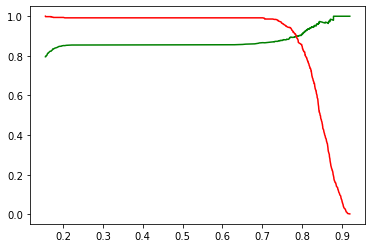

In [38]:
p, r, thresholds = precision_recall_curve(y_train, rfc.predict_proba(X_train)[:,1])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

`Predicted Probability of test dataset :`

In [39]:
y_test_prob = rfc.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame()

y_test_pred_final['pred'] = pd.Series(rfc.predict(X_test))
y_test_pred_final['pred_prob'] = y_test_prob

y_test_pred_final.head()

,pred,pred_prob
0,1,0.832805
1,1,0.800183
2,1,0.849932
3,0,0.150310
4,1,0.838745


In [40]:
y_test_pred_final.loc[:,'actual'] = list(y_test)

`Classification Using the Precision-Recall Curve Cutoff Probability :`

In [41]:
y_test_pred_final['final_predicted'] = y_test_pred_final.pred_prob.map( lambda x: 1 if x > 0.78 else 0)

y_test_pred_final.head()

,pred,pred_prob,actual,final_predicted
0,1,0.832805,1,1
1,1,0.800183,1,1
2,1,0.849932,1,1
3,0,0.150310,0,0
4,1,0.838745,1,1


`Confusion Matrix and Accuracy :`

In [42]:
print(confusion_matrix(y_test, y_test_pred_final['final_predicted']))
print(accuracy_score(y_test, y_test_pred_final['final_predicted']))

[[ 50  21]
 [ 28 196]]
0.8338983050847457


#### Acquisition Analytics Using Decile wise Lift 

In [43]:
y_test_pred_final = y_test_pred_final[['actual','pred_prob' ,'final_predicted']]

y_test_pred_final['decile'] = pd.qcut(y_test_pred_final['pred_prob'], 10, labels=np.arange(10, 0, -1))

lift_df = y_test_pred_final.groupby('decile')['pred_prob'].count().reset_index()

lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)
lift_df_pred = y_test_pred_final[y_test_pred_final['actual']==1].groupby('decile')['actual'].count().reset_index()
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,30,28,28,12.500000,1.250000
8,2,29,24,52,23.214286,1.160714
7,3,30,30,82,36.607143,1.220238
6,4,29,28,110,49.107143,1.227679
5,5,29,26,136,60.714286,1.214286
4,6,30,27,163,72.767857,1.212798
3,7,29,25,188,83.928571,1.198980
2,8,30,17,205,91.517857,1.143973
1,9,29,17,222,99.107143,1.101190
0,10,30,2,224,100.000000,1.000000


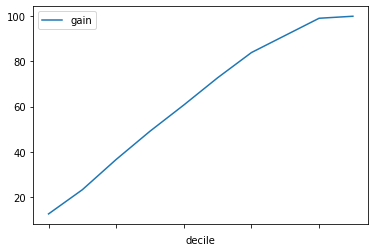

In [50]:
lift_df_final.plot.line(x='decile', y=['gain']);

### Conclusion

1. We Obtained an Accuracy of 83.38% over the test dataset.
2. 90 % of conversion can captured using 80 percentage of the client base